In [3]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jul 30 22:12:06 2018

@author: Kannadhasan
"""
##### importing libraries like pandas for importing data and keras for deep learning
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
# loading the csv into a dataframe 
data=pd.read_csv('E:/Bridge_DataSet-2.csv',encoding = 'ISO-8859-1')


In [8]:
# head of the data
print(data.head())
data=data.dropna()
#shuffling the rows of the data
data = data.sample(frac=1).reset_index(drop=True)
# getting the opinions into a label
text=data['Opinions'].values
# taking the sentiments into a list called label
label=data['Sentiment'].values
labs=[]
# dropping the Sentiment column from the dataframe
data.drop("Sentiment",inplace=True,axis=1)
### the loop below converts Neutral to 0 , positive to 1 and negative to 2 
for j in label:
    if j=="NEUTRAL":
        labs.append(0)
    elif j=="POSITIVE":
        labs.append(1)
    elif j=="NEGATIVE":
        labs.append(2)
    else:
        labs.append(-10)
# making the label column equal to the labs list
label=labs

                                            Opinions Sentiment  \
0  Public Funding Public representatives funding ...  NEGATIVE   
1  Public funding is in place for this very reaso...  POSITIVE   
2  Kilkenny needs to be managed this new road wil...  POSITIVE   
3  Save Kilkenny banners are just that, banners R...   NEUTRAL   
4  The money has been made available for this pro...   NEUTRAL   

               Name    Source  
0  CAS for Kilkenny  Facebook  
1  CAS for Kilkenny  Facebook  
2  CAS for Kilkenny  Facebook  
3  CAS for Kilkenny  Facebook  
4  CAS for Kilkenny  Facebook  


In [45]:
### plotting the label frequency
import matplotlib.pyplot as plt

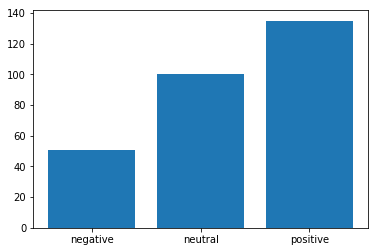

In [4]:
import collections
# counting the frequency of the labels 
counter=collections.Counter(label)
# xticks for the graph
ticks=["neutral","positive","negative"]
# getting the frequencies into a list
freq=list(counter.values())
plt.bar(ticks,freq) ## plotting a bar plot
plt.xticks([0,1,2])  
plt.show()


In [5]:
# giving the path for the glove file
glove_dir='F:/glove.6B.100d.txt'
#glove_dir='F:/glove.6B.100d.txt'
#creating a dictionary of the words and their corresponing vectors
embedding_index={}
# opening the glove vectors file
f=open(glove_dir,encoding="utf-8")
# the code appends the words and their vectors to the dictionary
for line in f:
    values=line.split()
    word=values[0]
    coefs=np.asarray(values[1:],dtype='float32')
    embedding_index[word]=coefs
f.close()

In [6]:
# importing nltk to tokenize the words
from nltk import word_tokenize
# the function below converts a given text to its vector form 
def convert_to_vec(text):
    tokens=word_tokenize(text) # splitting the text into words
    vec=np.ndarray((100,)) # creating a numpy arrya
    n=0 
    # the loop below takes the average of the vectors
    for j in tokens:

        try:
            vec=vec+embedding_index[j.lower()] # adding the vector of each word to vec
            n=n+1
        except:
            pass
    if n!=0:
        vec=vec/n
    return(pd.DataFrame(vec.reshape(1,100))) # returning the vector in form of a dataframe

In [7]:
### converting the text in opinions to vectors
dfs=[]
# the opinions get converted to vectors of dimension 100 below
for j in text: # loop over all the opinions
    dfs.append(convert_to_vec(j)) # append their vectors to a list
df=pd.concat(dfs,ignore_index=True) # convert the list of vectors to a dataframe

In [8]:
#df['Sentiment']=data['Sentiment']
df['Source']=data['Source'] # adding the source below
anonymous=[] # this list will contain the label if the opinion was anonymous 
for j in data['Name'].values: 
    if j=="Anonymous": 
        anonymous.append(1) # if the opinion is anonymous, append 1
    else:
        anonymous.append(0) # if not anonymous, append 0
# anonymity has been added as a feature below        
df['anonymous']=anonymous
# converting all the data to its numeric counterpart by creating dummy variables for categorical variables
df=pd.get_dummies(df)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,Source_Interview,Source_Kilkenny County Council website,Source_Kilkenny People,Source_Online form,Source_Submitted to CAS Opinion Stream via CiviQ website,Source_Submitted to CAS Opinion Stream via email,"Source_Tess Felder, Kilkenny People",Source_Unknown,"Source_Wikipedia, Strategic & Operational Objectives of CAS",Source_interview
0,-0.114603,0.147285,0.363289,-0.316497,-0.026439,0.071831,-0.094654,0.233675,-0.085626,-0.009210,...,0,0,0,0,0,0,0,1,0,0
1,0.091608,0.573065,0.287590,-0.390592,0.302327,0.140921,0.074026,0.523921,-0.113271,-0.019691,...,1,0,0,0,0,0,0,0,0,0
2,-0.137138,0.242357,0.270136,-0.261663,-0.112194,0.026801,-0.041748,0.318169,0.142754,0.051284,...,1,0,0,0,0,0,0,0,0,0
3,-0.147299,-0.006212,0.364358,-0.129374,0.101739,0.281989,-0.106880,0.193132,-0.031372,-0.023229,...,0,0,0,0,0,0,0,0,0,0
4,-0.126984,0.295978,0.519429,-0.274081,-0.179245,0.114333,-0.139671,0.124223,-0.036176,-0.066798,...,0,0,0,0,0,0,0,1,0,0


In [9]:
# importing libraries from keras for deep learning
from keras.models import Sequential
from keras.layers import Embedding,Flatten,Dense
from keras import regularizers # for regularization
model=Sequential() # we will build a sequential model
# adding a dense layer of 32 units and which will take input of dimension 108
model.add(Dense(32,activation='relu',input_dim=115))
# adding another layer of which outputs 3 values for each row and has softmax activation 
model.add(Dense(3,activation="softmax"))
# printing model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                3712      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 3,811
Trainable params: 3,811
Non-trainable params: 0
_________________________________________________________________


In [27]:
# creating training data with 50% of the avaialble labelled data
x_train=df[1:round(0.7*len(df))]
# validation data is the rest of the data 
x_val=df[round(0.7*len(df)):]
#filling the na values with 0
x_train=x_train.fillna(0)
x_val=x_val.fillna(0)
# training labels below
y_train=np.array(label[1:round(0.7*len(df))])
# validation labels below
y_val=np.array(label[round(0.7*len(df)):])

from keras.utils import to_categorical
y_train = to_categorical(y_train) # making the labels into categorical
y_val = to_categorical(y_val) #labels to categorical variable
# compiling the model with loss of categorical cross entropy
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])
# fitting the model with 100 epochs and 32 batch size
history=model.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_val,y_val))
#model.save_weights('F:/pre_trained_glove_model.h5') # savng the weights
# predicting the output 
predicted=model.predict_classes(x_val)


Train on 199 samples, validate on 86 samples
Epoch 1/100
199/199 [==============================] - 0s 1ms/step - loss: 0.0968 - acc: 0.9950 - val_loss: 0.9241 - val_acc: 0.7791
Epoch 2/100
199/199 [==============================] - 0s 103us/step - loss: 0.0910 - acc: 1.0000 - val_loss: 0.7916 - val_acc: 0.8256
Epoch 3/100
199/199 [==============================] - 0s 124us/step - loss: 0.0857 - acc: 1.0000 - val_loss: 0.7427 - val_acc: 0.8605
Epoch 4/100
199/199 [==============================] - 0s 123us/step - loss: 0.0792 - acc: 1.0000 - val_loss: 0.7663 - val_acc: 0.8488
Epoch 5/100
199/199 [==============================] - 0s 143us/step - loss: 0.0791 - acc: 1.0000 - val_loss: 0.7834 - val_acc: 0.8372
Epoch 6/100
199/199 [==============================] - 0s 108us/step - loss: 0.0776 - acc: 1.0000 - val_loss: 0.7851 - val_acc: 0.8372
Epoch 7/100
199/199 [==============================] - 0s 123us/step - loss: 0.0761 - acc: 1.0000 - val_loss: 0.7455 - val_acc: 0.8372
Epoch 8/100


In [28]:
from sklearn.metrics import classification_report
# creating the validation labels
y_val_lab=label[round(0.7*len(df)):]
# printing the classification report
print(classification_report(y_val_lab, predicted))

             precision    recall  f1-score   support

          0       0.65      0.79      0.71        14
          1       0.73      0.83      0.77        29
          2       0.86      0.72      0.78        43

avg / total       0.78      0.77      0.77        86



The precision value for label 2 i.e. the negative labels is quite high i.e. 72%. The precision value for label 1 is 33% which may be attributed to the small size of data. The recall is the ratio of true labels that the code could predcit successfuly. Again , it is 75% for label 2 i.e. negative and less for labels 1 and 0.

In [29]:
######### Confusion matrix
from sklearn.metrics import confusion_matrix
print("Confusion matrix")
pd.DataFrame(confusion_matrix(y_val_lab, predicted))

Confusion matrix


,0,1,2
0,11,1,2
1,2,24,3
2,4,8,31


In [30]:
################### SVM
x_train=x_train.fillna(0) # filling na values with zero
x_val=x_val.fillna(0) # filling na values with zero
# code for SVM 
from sklearn.svm import SVC  
y_lab=label[1:round(0.7*len(df))] # taking labels from 50% of data as training data
y_val_lab=label[round(0.7*len(df)):] # taking labels from 50% rest of the data as test data
svclassifier = SVC(kernel='linear')   # making the instance of the classfier
svclassifier.fit(x_train, y_lab)  # fitting the data on the training data
# predicting the data on the validation data
y_pred = svclassifier.predict(x_val)
# printing of the classification report
print(classification_report(y_val_lab, y_pred))
print("Confusion matrix")
pd.DataFrame(confusion_matrix(y_val_lab, y_pred))

             precision    recall  f1-score   support

          0       0.40      0.14      0.21        14
          1       0.61      0.59      0.60        29
          2       0.66      0.81      0.73        43

avg / total       0.60      0.63      0.60        86

Confusion matrix


,0,1,2
0,2,5,7
1,1,17,11
2,2,6,35


The precision value for label 2 i.e. the negative labels is quite high i.e. 75%. The precision value for label 1 is 38% which may be attributed to the small size of data. The recall is the ratio of true labels that the code could predcit successfuly. Again , it is 80% for label 2 i.e. negative and less for labels 1 and 0.

In [31]:
########### NAIVe BAYES
from sklearn.naive_bayes import GaussianNB # imporing Naive Bayes
NB = GaussianNB() # instance of the Naive Bayes classifier
NB.fit(x_train,y_lab) # fitting the data on the training data
y_pred = NB.predict(x_val) # predicting on the validation set

In [32]:
#### classification report for NAIVA BAYES
print(classification_report(y_val_lab, y_pred))
print("Confusion matrix")
pd.DataFrame(confusion_matrix(y_val_lab, y_pred))

             precision    recall  f1-score   support

          0       0.33      0.14      0.20        14
          1       1.00      0.14      0.24        29
          2       0.54      0.95      0.69        43

avg / total       0.66      0.55      0.46        86

Confusion matrix


,0,1,2
0,2,0,12
1,2,4,23
2,2,0,41


The precision value for label 2 i.e. the negative labels is quite high i.e. 64%. The precision value for label 1 is 27% which may be attributed to the small size of data. The recall is the ratio of true labels that the code could predcit successfuly. Again , it is 54% for label 2 i.e. negative and less for labels 1 and 0.

In [1]:
#######################TOPIC MODELLING
# import os library 
import os 
data=pd.read_csv("E:/Bridge_DataSet-2.csv",encoding = "ISO-8859-1") # importing data
data=data.dropna() # dropping na values
data.drop("Sentiment",inplace=True,axis=1) # dropping sentiment column
data.drop("Name",inplace=True,axis=1)  # dropping NAME column
data.drop("Source",inplace=True,axis=1) # dropping Source
data=data.dropna() # drpping na values
text123=data['Opinions'].values # putting all opininons in text123 list


NameError: name 'pd' is not defined

In [30]:
# importing libraries for lemmatizing words
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  # library for lemmatizing
import numpy as np # importing numpy
from gensim.models.word2vec import Word2Vec
# for removing stopwords , we create a list of english stop words
stop=stopwords.words('english')
# making a list of punctuations
punt=list(set(string.punctuation))
stop.extend(punt) # adding the punctuations to the stop words
print("punctuations  here")
stop

punctuations  here


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
# importing all libraries for lda
import _pickle as pickle
from gensim.corpora import Dictionary, MmCorpus
from gensim.models.ldamulticore import LdaMulticore
import pyLDAvis
import pyLDAvis.gensim
import warnings



In [32]:
#tokenization
tok=[]
wl=WordNetLemmatizer()
# tokenizing and lemmatizing
for k in text123:
    wr=[wl.lemmatize(j.strip().lower()) for j in word_tokenize(k) if j.strip().lower() not in stop] # adding lemmatized tokenized words to the list
    tok.append(wr)

In [33]:
# dictionary of tokens
dictionary=Dictionary(tok)
dictionary.filter_extremes(no_below=1) # filtering words whose frequency is 1 or below
# compactifying dicitonary
dictionary.compactify()

In [34]:
dictionary.token2id # printing the dictionary with the words and their index

{"'have": 800,
 "'how": 709,
 "'ll": 190,
 "'m": 268,
 "'s": 275,
 "'ve": 887,
 '...': 569,
 '11': 389,
 '1970s-style': 889,
 '21st': 116,
 '8': 859,
 'abreast': 475,
 'absolutely': 655,
 'acccess': 762,
 'accept': 258,
 'access': 626,
 'accessibility': 928,
 'accident': 220,
 'accommodation': 476,
 'account': 531,
 'accountable': 738,
 'achieved': 441,
 'across': 778,
 'act': 162,
 'action': 22,
 'add': 82,
 'adding': 488,
 'addressed': 103,
 'adequate': 787,
 'adopts': 890,
 'afford': 946,
 'afield': 350,
 'agenda': 453,
 'agree': 204,
 'ahead': 366,
 'air': 457,
 'alleviate': 567,
 'allow': 13,
 'allows': 817,
 'alone': 621,
 'also': 645,
 'alternative': 198,
 'always': 259,
 'amazed': 853,
 'amount': 301,
 'analysis': 905,
 'anger': 177,
 'angle': 630,
 'another': 0,
 'answer': 102,
 'antything': 721,
 'anybody': 732,
 'anything': 223,
 'anyway': 631,
 'appreciation': 941,
 'approach': 891,
 'approved': 597,
 'archaeology': 589,
 'archeology': 227,
 'area': 104,
 'asked': 499,
 'as

In [35]:
# function for generating bag of words
def bow_generator(df):
    for k in df:
        # strip white spaces, and lemmatize 
        wr=[wl.lemmatize(j.strip().lower()) for j in word_tokenize(k) if j.strip().lower() not in stop ] # adding words to the list
        yield(dictionary.doc2bow(wr)) # yeilding the bag with words

In [36]:
# path to store the bag of words
bow_path="F:/bow.mm"
# serializeing the corpus
MmCorpus.serialize(bow_path,bow_generator(text123))
bow_corpus=MmCorpus(bow_path)

In [37]:
# fitting the lda model with multiprocessing thread
lda=LdaMulticore(bow_corpus,num_topics=20,id2word=dictionary,workers=3)

In [38]:
# topic exploration
def explore_topic(topic_num,topn=10):
    #for finding the term frequency in lda 
    for term,frequency in lda.show_topic(topic_num,topn):
        print('{:20} {:.3f}'.format(term,round(frequency,3)))

In [39]:
explore_topic(topic_num=3)

would                0.030
kilkenny             0.029
city                 0.027
road                 0.019
traffic              0.015
need                 0.015
amount               0.014
infrastructure       0.014
future               0.013
level                0.009


In [40]:
#preparing the LDA visualization
ldavis_prepared=pyLDAvis.gensim.prepare(lda,bow_corpus,dictionary)

In [41]:
#displaying the topics using pyldavis
pyLDAvis.display(ldavis_prepared)

In [42]:
################## for sentiment analysis
# importing data into pandas
data=pd.read_csv('F:/Bridge_DataSet-2.csv',encoding = 'ISO-8859-1')
data=data.dropna() # dropping na values
data=data.reset_index(drop=True) # resetting index
data.head()

,Opinions,Sentiment,Name,Source
0,Public Funding Public representatives funding ...,NEGATIVE,CAS for Kilkenny,Facebook
1,Public funding is in place for this very reaso...,POSITIVE,CAS for Kilkenny,Facebook
2,Kilkenny needs to be managed this new road wil...,POSITIVE,CAS for Kilkenny,Facebook
3,"Save Kilkenny banners are just that, banners R...",NEUTRAL,CAS for Kilkenny,Facebook
4,The money has been made available for this pro...,NEUTRAL,CAS for Kilkenny,Facebook


In [46]:
# function for extracting words
def find_sentiment(word):
    pos_count=0 # count of positive words
    neg_count=0# count of negative words
    neutral_count=0# count of neutral words
    for i in range(len(data)):
        if word in data.loc[i,'Opinions']:
            if data.loc[i,'Sentiment']=="POSITIVE": # adding score if the corresponding label is positive
                pos_count=pos_count+1
            if data.loc[i,'Sentiment']=="NEGATIVE":# adding score if the corresponding label is positive
                neg_count=neg_count+1
            if data.loc[i,'Sentiment']=="NEUTRAL":# adding score if the corresponding label is positive
                neutral_count=neutral_count+1
    print(dict(zip(['POSITIVE','NEGATIVE','NEUTRAL'],[pos_count,neg_count,neutral_count]))) # printing dictionary of sentiment and count
    # plotting graph of sentiments
    plt.bar(['POSITIVE','NEGATIVE','NEUTRAL'],[pos_count,neg_count,neutral_count])
    plt.xticks([0,1,2])
    plt.title("sentiment graph")
    plt.show(
    )

{'POSITIVE': 3, 'NEGATIVE': 1, 'NEUTRAL': 1}


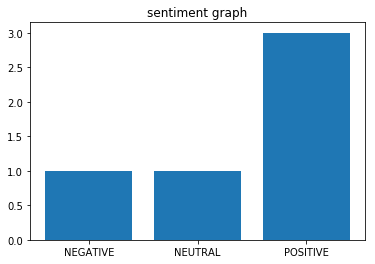

In [50]:
find_sentiment("infrastructure")